In [2]:
import pandas as pd
import yfinance as yf

def get_data(stock):
    #get historical stock data 
    YEARS = 3
    WEEKS = 1
    start = (pd.Timestamp.now() - pd.DateOffset(weeks=WEEKS)).strftime('%Y-%m-%d')
    END = pd.Timestamp.now().strftime('%Y-%m-%d')
    stock_data = yf.download(stock, start=start, end=END)
    #stock_data['Date'] = stock_data.index
    stock_data.reset_index(inplace=True)
    #stock_data.reset_index(inplace=True, drop=False)
    # Calculate daily returns
    stock_data['Daily Return'] = stock_data['Close'].pct_change()
    
    
    # Separate gains and losses
    stock_data['Gain'] = stock_data['Daily Return'].apply(lambda x: x if x > 0 else 0)
    stock_data['Loss'] = stock_data['Daily Return'].apply(lambda x: -x if x < 0 else 0)
    
    # Calculate average gain and loss
    window = 14
    stock_data['Avg Gain'] = stock_data['Gain'].rolling(window=window).mean()
    stock_data['Avg Loss'] = stock_data['Loss'].rolling(window=window).mean()
    
    # Calculate RS and RSI
    stock_data['RS'] = stock_data['Avg Gain'] / stock_data['Avg Loss']
    stock_data['RSI'] = 100 - (100 / (1 + stock_data['RS']))
    
    # Calculate the 26-day moving average of the closing prices
    stock_data['MA_26_Day'] = stock_data['Close'].rolling(window=26).mean()

    # Return the final DataFrame
    return stock_data[['Date', 'Low','High', 'Close', 'MA_26_Day', 'RSI', 'Volume']]

print(get_data('TSM'))

[*********************100%%**********************]  1 of 1 completed
        Date         Low        High       Close  MA_26_Day  RSI    Volume
0 2024-03-18  136.610001  141.539993  136.639999        NaN  NaN  14732900
1 2024-03-19  133.029999  136.270004  134.869995        NaN  NaN  17341100
2 2024-03-20  135.009995  137.309998  136.750000        NaN  NaN  12750200
3 2024-03-21  139.039993  142.600006  139.449997        NaN  NaN  17809400
4 2024-03-22  139.110001  141.339996  140.539993        NaN  NaN   9935200


In [3]:
stock = 'PANW'
data = get_data(stock)
high = data['High']
low = data['Low']

def calculate_fibonacci_levels(high, low):
    fib_ratios = [0.236, 0.382, 0.5, 0.618, 0.786]
    return {f"{int(ratio * 100)}%": high - (high - low) * ratio for ratio in fib_ratios}

fib_levels = calculate_fibonacci_levels(high, low)
#print("Fibonacci Levels:", fib_levels)

def determine_entry_position(fib_levels):
    # Example: Choosing 61.8% level as entry, this can be adjusted
    return fib_levels["61%"]

entry_price = determine_entry_position(fib_levels)

def calculate_stop_loss_and_target(entry, fib_levels, fib_ratios):
    # Assuming stop loss just below the next level down (50% for this example) and target profit at 23.6%
    stop_loss = fib_levels["50%"] - (entry - fib_levels["50%"]) * 0.05 # 5% below the 50% level for buffer
    target_profit = entry + (entry - fib_levels["78%"]) # Targeting just above the entry level for profit
    return stop_loss, target_profit

stop_loss, target_profit = calculate_stop_loss_and_target(entry_price, fib_levels, [0.236, 0.382, 0.5, 0.618, 0.786])
print("Stop Loss:", stop_loss)
print("Target Profit:", target_profit)
print("Suggested Entry Position:", entry_price)

[*********************100%%**********************]  1 of 1 completed
Stop Loss: 0    283.937154
1    280.389782
2    281.027150
3    285.905574
4    288.256453
dtype: float64
Target Profit: 0    284.177499
1    280.724503
2    281.267496
3    286.283511
4    288.491507
dtype: float64
Suggested Entry Position: 0    283.261897
1    279.449378
2    280.351894
3    284.843750
4    287.596064
dtype: float64


In [8]:
print(stop_loss)

0    317.678116
1    312.383338
2    314.780571
3    304.256846
4    297.280889
dtype: float64


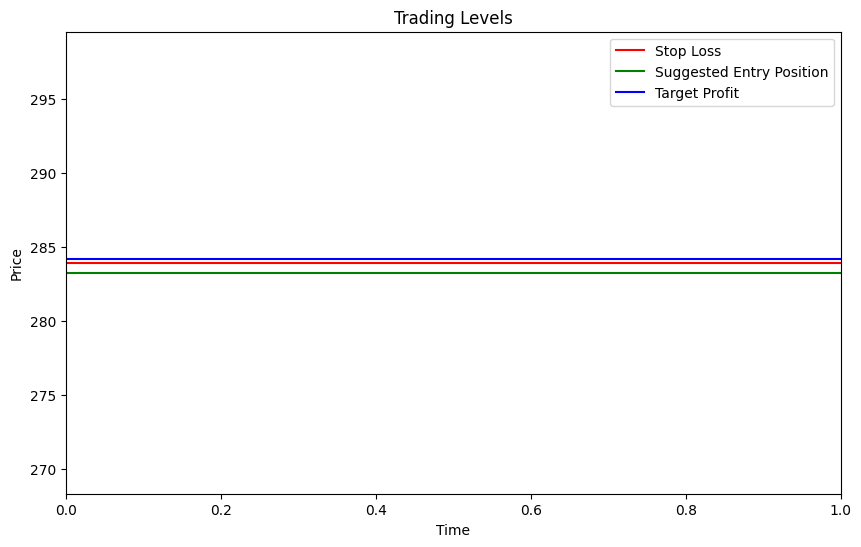

In [4]:
import matplotlib.pyplot as plt

# Creating a simple plot
plt.figure(figsize=(10, 6))

# Plotting horizontal lines for each trading level
plt.axhline(y=stop_loss[0], color='r', linestyle='-', label='Stop Loss')
plt.axhline(y=entry_price[0], color='g', linestyle='-', label='Suggested Entry Position')
plt.axhline(y=target_profit[0], color='b', linestyle='-', label='Target Profit')

# Adding legend to the plot
plt.legend()

# Adding titles and labels
plt.title('Trading Levels')
plt.xlabel('Time')
plt.ylabel('Price')

# Displaying the plot
plt.show()

[*********************100%%**********************]  1 of 1 completed


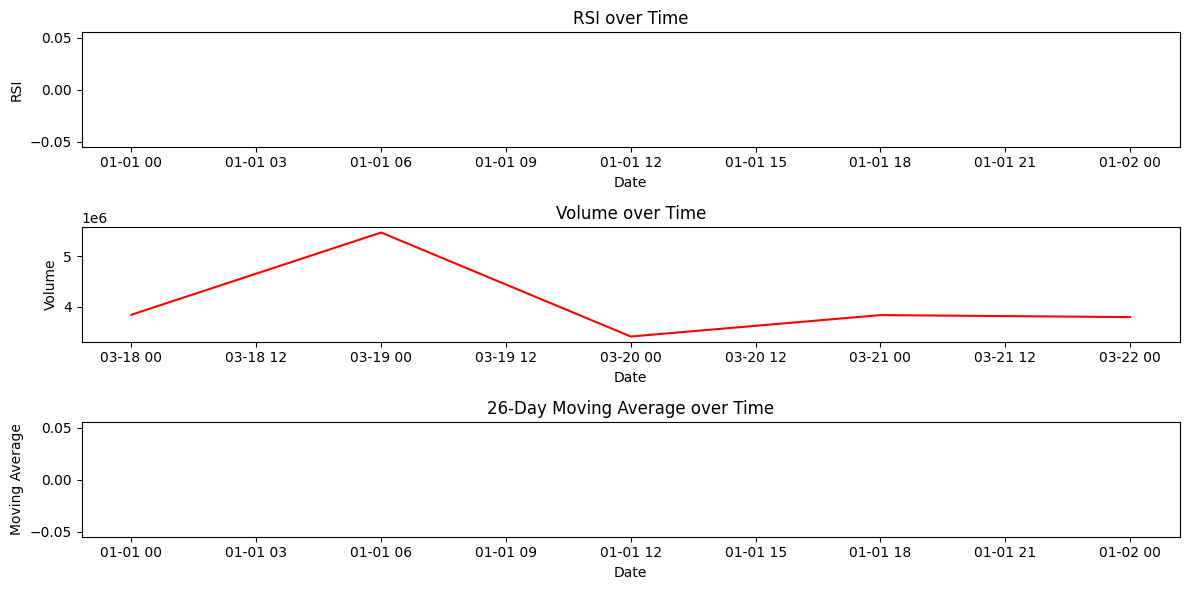

In [5]:
import matplotlib.pyplot as plt
# Plotting
stock = 'PANW'
data = get_data(stock)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['RSI'], color='blue')
plt.title('RSI over Time')
plt.xlabel('Date')
plt.ylabel('RSI')

plt.subplot(3, 1, 2)
plt.plot(data['Date'], data['Volume'], color='red')
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.subplot(3, 1, 3)
plt.plot(data['Date'], data['MA_26_Day'], color='green')
plt.title('26-Day Moving Average over Time')
plt.xlabel('Date')
plt.ylabel('Moving Average')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price')

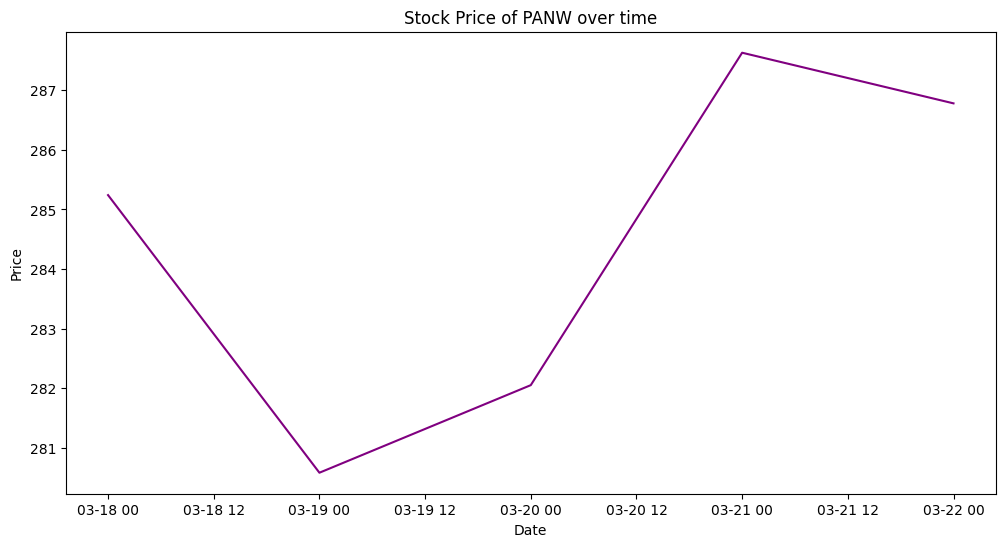

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='Purple')
plt.title(f'Stock Price of {stock} over time')
plt.xlabel('Date')
plt.ylabel('Price')